# Laliga data set Analysis 
The laliga dataset contains the data from 1995 to 2020 seasons and we will analyze different seasons and draw some conclusion through visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [18, 5]
pd.set_option('display.max_rows', 42)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
laliga = pd.read_csv('dataset/laliga.csv')

In [4]:
laliga.head(5)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D


In [5]:
laliga.tail(5)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
10039,2020-21,22/05/2021,Osasuna,Sociedad,0,1,A,0.0,0.0,D
10040,2020-21,22/05/2021,Real Madrid,Villarreal,2,1,H,0.0,1.0,A
10041,2020-21,22/05/2021,Valladolid,Ath Madrid,1,2,A,1.0,0.0,H
10042,2020-21,23/05/2021,Granada,Getafe,0,0,D,0.0,0.0,D
10043,2020-21,23/05/2021,Sevilla,Alaves,1,0,H,0.0,0.0,D


In [6]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10044 non-null  object 
 1   Date      10044 non-null  object 
 2   HomeTeam  10044 non-null  object 
 3   AwayTeam  10044 non-null  object 
 4   FTHG      10044 non-null  int64  
 5   FTAG      10044 non-null  int64  
 6   FTR       10044 non-null  object 
 7   HTHG      10042 non-null  float64
 8   HTAG      10042 non-null  float64
 9   HTR       10042 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 784.8+ KB


## Analysis of the 95-96 season

In [7]:
season_95 = laliga[laliga['Season'] == '1995-96']

##### How many teams were in the season 1995-1996

In [8]:
no_of_teams = season_95['HomeTeam'].unique().size
print(f"{no_of_teams} teams participated in Season 1995-1996")

22 teams participated in Season 1995-1996


#### The champion team

In [9]:
# record will be stored for each team's away and home scored goals in a tuple form 
teams_records = {}

In [10]:
for value,row in season_95.iterrows():
    home = row['HomeTeam']
    away = row['AwayTeam']
    if row['FTR'] == 'H':
        if home in teams_records:
            teams_records[home] += 3
        else:
            teams_records[home] = 3
    elif row['FTR'] == 'A':
        if away in teams_records:
            teams_records[away] += 3
        else:
            teams_records[away] = 3
    else:
        if away in teams_records:
            teams_records[away] += 1
        else:
            teams_records[away] = 1
        
        if home in teams_records:
            teams_records[home] += 1
        else:
            teams_records[home] = 1

In [11]:
def get_max(record):
    """Recieve the dictionary and return key with max value"""
    val = list(record.values())
    keys = list(record.keys())
    return keys[val.index(max(val))]

### League Winner

In [12]:
print(f'{get_max(teams_records)}  won the 1995-1996 league')

Ath Madrid  won the 1995-1996 league


## Analyzing the home, away wins and draws throughout the season for all teams

In [13]:
# seperating the dataFrames for away, home and draw
home_wins_95 = season_95[season_95['FTR']=='H'].groupby('HomeTeam').agg({'FTR':'count'})
away_wins_95 = season_95[season_95['FTR']=='A'].groupby('AwayTeam').agg({'FTR':'count'})
draw_95 = season_95[season_95['FTR']=='D'].groupby('AwayTeam').agg({'FTR':'count'})

In [14]:
# renaming the column in the dataFrames and then combining into one
home_wins_95.rename(columns={'FTR':'Home_wins'}, inplace=True)
away_wins_95.rename(columns={'FTR':'Away_wins'}, inplace=True)
draw_95.rename(columns={'FTR':'draws'}, inplace=True)

In [15]:
# merging the above dataFrames and renaming the index
home_away_combined_df = home_wins_95.merge(away_wins_95, left_index=True, right_index=True)
results_95 = home_away_combined_df.merge(draw_95, left_index=True, right_index=True)
results_95.index.names = ['Team']
results_95.sort_values(['Home_wins','Away_wins','draws'], ascending=False, inplace=True)

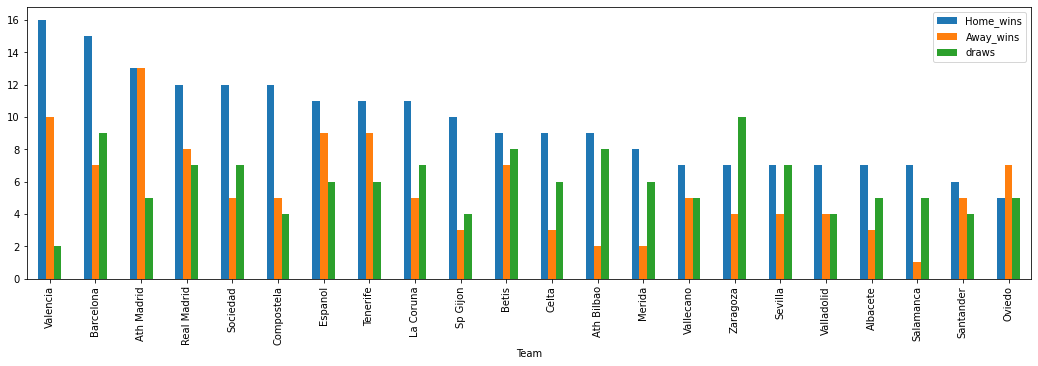

In [16]:
results_95.plot(kind='bar')
plt.show()

##### Teams and points

In [17]:
#converting the teams points to a DataFrame
teams_points = pd.DataFrame(teams_records.items(),columns=["Team","Points"])
teams_points.sort_values('Points',ascending=False,inplace=True)

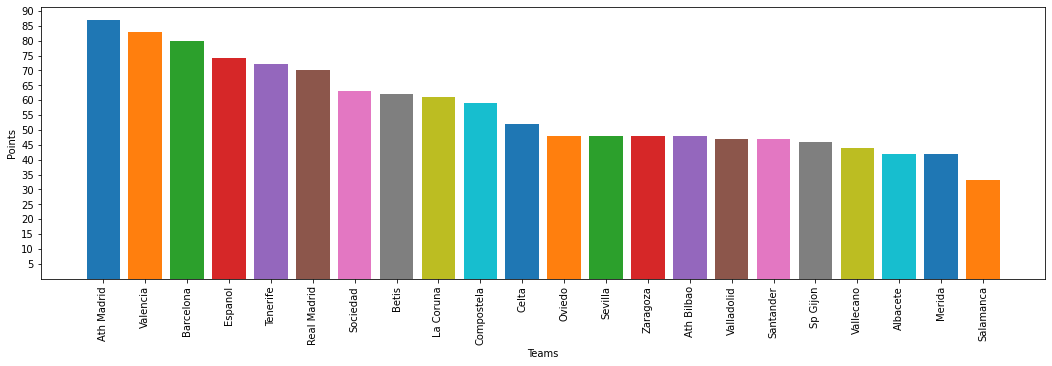

In [18]:
fig, ax = plt.subplots()
for index,row in teams_points.iterrows():
    ax.bar(row["Team"],row["Points"])

plt.xticks(rotation=90)
plt.yticks([x+5 for x in range(0,90,5)])
plt.xlabel("Teams")
plt.ylabel("Points")
plt.show()

### Analysis of Top three teams, Athletico Madrid, Valencia and Barcelona

In [19]:
# converting the Date column from Object to Date 
season_95['Date'] = pd.to_datetime(season_95['Date'])

In [20]:
season_95.sort_values('Date', inplace=True)

In [21]:
valencia = season_95[(season_95['HomeTeam']=='Valencia') | (season_95['AwayTeam']=='Valencia')]
athletico_madrid = season_95[(season_95['HomeTeam']=='Ath Madrid') | (season_95['AwayTeam']=='Ath Madrid')]
barcelona = season_95[(season_95['HomeTeam']=='Barcelona') | (season_95['AwayTeam']=='Barcelona')]

In [22]:
# to be executed on;y once
valencia.reset_index(inplace=True)
del valencia["index"]

athletico_madrid.reset_index(inplace=True)
del athletico_madrid["index"]

barcelona.reset_index(inplace=True)
del barcelona["index"]

In [23]:
#adding league score, represeting the full time score that will be made commulative latter on for title race after every match
valencia["league_score"] = 0
athletico_madrid["league_score"] = 0
barcelona["league_score"] = 0

In [24]:
#adding scores in "league score column based on the match results"
for ind,row in valencia.iterrows():
    if (row["AwayTeam"] == "Valencia") & (row["FTR"] == "A") :
        valencia.loc[ind,"league_score"] = 3
    elif (row["HomeTeam"] == "Valencia") & (row["FTR"] == "H") :
        valencia.loc[ind,"league_score"] = 3
    elif row["FTR"] == "D":
        valencia.loc[ind,"league_score"] = 1
    else:
        valencia.loc[ind,"league_score"] =0

for ind,row in athletico_madrid.iterrows():
    if (row["AwayTeam"] == "Ath Madrid") & (row["FTR"] == "A") :
        athletico_madrid.loc[ind,"league_score"] = 3
    elif (row["HomeTeam"] == "Ath Madrid") & (row["FTR"] == "H") :
        athletico_madrid.loc[ind,"league_score"] = 3
    elif row["FTR"] == "D":
        athletico_madrid.loc[ind,"league_score"] = 1
    else:
        athletico_madrid.loc[ind,"league_score"] =0
        
for ind,row in barcelona.iterrows():
    if (row["AwayTeam"] == "Barcelona") & (row["FTR"] == "A") :
        barcelona.loc[ind,"league_score"] = 3
    elif (row["HomeTeam"] == "Barcelona") & (row["FTR"] == "H") :
        barcelona.loc[ind,"league_score"] = 3
    elif row["FTR"] == "D":
        barcelona.loc[ind,"league_score"] = 1
    else:
        barcelona.loc[ind,"league_score"] =0

In [25]:
valencia["league_score"] = valencia["league_score"].cumsum()
athletico_madrid["league_score"] = athletico_madrid["league_score"].cumsum()
barcelona["league_score"] = barcelona["league_score"].cumsum()

In [26]:
lis = []
for value in range(42):
    lis.append(f"Week{value+1}")

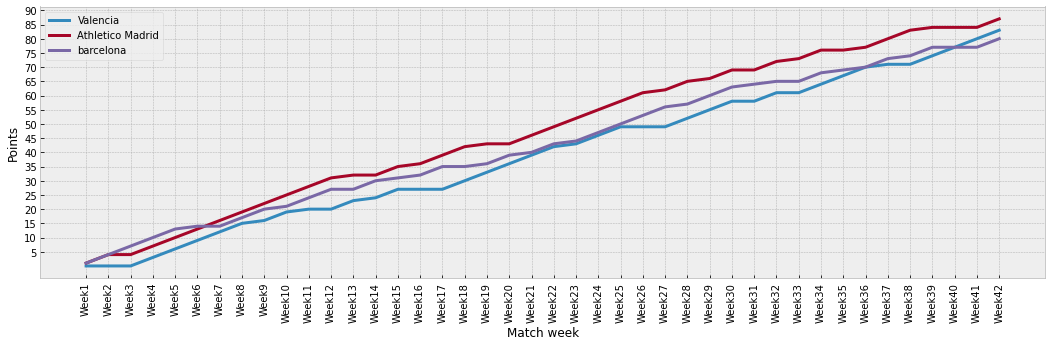

In [27]:
plt.style.use("bmh")
fig, ax = plt.subplots()
ax.plot(lis,valencia.league_score,label="Valencia",linewidth=3)
ax.set_label("Valencia")
ax.plot(lis,athletico_madrid.league_score, label="Athletico Madrid",linewidth=3)
plt.xticks(rotation=90)
ax.set_label("Athletico madrid")
ax.plot(lis,barcelona.league_score,label="barcelona",linewidth=3)
ax.legend()
ax.set_xlabel("Match week")
ax.set_ylabel("Points")
plt.yticks([x+5 for x in range(0,90,5)])
plt.show()